Entrenando
Fin entrenamiento
Probamos la red neuronal con datos de prueba: 
Graficos de Evolucion del Error


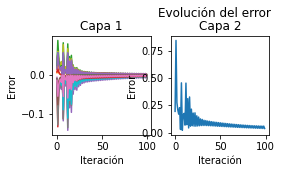

In [4]:
import csv

from matplotlib.pyplot import *
from numpy import *



# Funcion para convertir un archivo tipo .csv a una lista.
# Usado para la entrada de entrenamiento y test
def convertir_csv(filename):
    data = []
    file = open(filename, newline='')
    reader = csv.reader(file, delimiter=',')
    for row in reader:
        entrada1 = float(row[0])
        entrada2 = float(row[1])
        entrada3 = float(row[2])
        entrada4 = float(row[3])
        data.append([entrada1, entrada2, entrada3, entrada4])
    return data


# Funcion para convertir un archivo tipo .csv a una lista.
# Usado para la salida de entrenamiento
def convertir_scsv(filename):
    data = []
    file = open(filename, newline='')
    reader = csv.reader(file, delimiter=',')
    for row in reader:
        # row = [Salida 1 (int)]
        salida1 = float(row[0])
        data.append([salida1])
    return data


error_capa1 = []
error_capa2 = []


# Funcion para calcular el porcentaje de aciertos.
def calculatesucc(y_test_obtenido):
    y_test_deseado = array(convertir_scsv('./Y_test_deseado.csv'))    
    acum0 = 0
    for i in range(len(y_test_obtenido)):
        if abs(y_test_deseado[i] - y_test_obtenido[i]) == 0:
            acum0 += 1
    print("Porcentaje de aciertos")
    print(str(round((acum0 / len(y_test_obtenido)) * 100, 2)) + '%')


# Funcion para graficar el error.
def ploterror():
    subplot(231)
    plot(error_capa1)
    xlabel('Iteración')
    ylabel('Error')
    title("Capa 1")

    subplot(232)
    plot(error_capa2)
    xlabel('Iteración')
    ylabel('Error')
    title("Capa 2")    
    suptitle('Evolución del error')

# Funcion para convertir una lista en un archivo .csv
def tocsv(filename, data):
    file = open(filename, 'w', newline='')
    writer = csv.writer(file)
    for i in range(len(data)):
        writer.writerow(data[i])


class CapaNeuronal:
    def __init__(self, cantidad_de_neuronas, cantidad_de_entradas_por_neurona):
        self.pesos = 2 * random.random((cantidad_de_entradas_por_neurona, cantidad_de_neuronas)) - 1


class RedNeuronal:
    def __init__(self, capa1, capa2):
        self.capa1 = capa1
        self.capa2 = capa2

    # La función sigmoidal, que describe una curva en forma de S
    # Se pasan la suma ponderada de las entradas a través de esta función para 
    # normalizarlos entre 0 y 1.
    def __sigmoidal(self, x):
        return 1 / (1 + exp(-x))

    # La derivada de la función sigmoidal.
    # Este es el gradiente de la función sigmoidal.
    # Indica la confianza que tenemos en el peso existente.
    def __derivada_sigmoidal(self, x):
        return x * (1 - x)

    # Entrenamos a la red neuronal a través de un proceso de prueba y error
    # Se realiza un ajuste de los pesos sinápticos cada vez.
    def entrenar(self, entrenamiento_set_entradas, entrenamiento_set_salida, cantidad_de_ciclos, tasa_aprendizaje):
        for iteration in range(cantidad_de_ciclos): 
            salida_de_capa_1, salida_de_capa_2 = self.think(entrenamiento_set_entradas)            
      
            # Calcula el error de la capa 5
            capa2_error = entrenamiento_set_salida - salida_de_capa_2
            capa2_delta = capa2_error * self.__derivada_sigmoidal(salida_de_capa_2)

            # Calcula el error de la capa 1 (Inspeccionando los pesos en la capa 1,
            # podemos determinar cuanto influye en el error de la capa 2).
            capa1_error = capa2_delta.dot(self.capa2.pesos.T)
            capa1_delta = capa1_error * self.__derivada_sigmoidal(salida_de_capa_1)

            # Se calcula el ajuste de pesos
            self.capa1.pesos += tasa_aprendizaje * entrenamiento_set_entradas.T.dot(capa1_delta)
            self.capa2.pesos += tasa_aprendizaje * salida_de_capa_1.T.dot(capa2_delta)

            error_capa1.append(capa1_error[0])
            error_capa2.append(capa2_error[0])
            

    # La red neuronal realiza el producto punto en base a las entradas
    def think(self, entradas):
        salida_de_capa1 = self.__sigmoidal(dot(entradas, self.capa1.pesos))
        salida_de_capa2 = self.__sigmoidal(dot(salida_de_capa1, self.capa2.pesos))
        
        return salida_de_capa1, salida_de_capa2        

if __name__ == "__main__":
    # Definimos una semilla del generador de números aleatorios, a fin de generar
    # los mismo números aleatorios en cada proceso.
    random.seed(1)

    # Creamos la capa 1 (17 neuronas con 4 entradas)
    capa1 = CapaNeuronal(17, 4)
    # Creamos la capa 2 (1 neurona con 17 entradas)
    capa2 = CapaNeuronal(1, 17)

        # Combinamos las capas para crear la red neuronal
    red_neuronal = RedNeuronal(capa1, capa2)

    # Entrenar la red neuronal utilizando el conjunto de entrenamiento.
    print("Entrenando")
    # e_s_e : entrenamiento_set_entradas
    e_s_e = array(convertir_csv('./X_train.csv'))
    # e_s_s : entrenamiento_set_salida
    e_s_s = array(convertir_scsv('./Y_train.csv'))
    # t_a : tasa_aprendizaje
    t_a = 0.000631
    ciclos = 10000
    red_neuronal.entrenar(e_s_e, e_s_s, ciclos, t_a)
    print("Fin entrenamiento")

    # Probamos la red neuronal con datos de prueba.
    print("Probamos la red neuronal con datos de prueba: ")
    # test: set_pruebas
    x_test = array(convertir_csv('./X_test.csv'))
    #recordar cambiar ese X_test por el original que envio el profe!
    capa_oculta, output = red_neuronal.think(x_test)
    tocsv('./Y_result.csv', around(output).astype(float))
    print("Graficos de Evolucion del Error")    
    ploterror()
    #print("Fin de la Prueba")
    #print("Archivo de Salida Generado")    
    #calculatesucc(around(output).astype(float))
